<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Check-in" data-toc-modified-id="Final-Project-Check-in-1">Final Project Check-in</a></span></li><li><span><a href="#Group-Name" data-toc-modified-id="Group-Name-2">Group Name</a></span></li><li><span><a href="#Student-Names" data-toc-modified-id="Student-Names-3">Student Names</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4">Load Data</a></span></li><li><span><a href="#Fit-scikit-learn-model" data-toc-modified-id="Fit-scikit-learn-model-5">Fit scikit-learn model</a></span></li><li><span><a href="#Evaluation-Metric" data-toc-modified-id="Evaluation-Metric-6">Evaluation Metric</a></span></li></ul></div>

Final Project - Grace Hoppers
------

Group Name
-----

The Grace Hoppers 

Student Names
----

1. Akansha Shrivastava
2. Ivette Sulca
3. Bing Wang

### Preinstall requirements

pip install geonamescache

1) ASK:
----

- QUESTION: Can we predict the rating of a recipe?
- Source of the data: https://www.kaggle.com/hugodarwood/epirecipes
- Description of the dataset: Epicurious is a website for recipes.Each recipe may include a description, a list of ingredients, step by step directions, and a caloric breakdown

2) ACQUIRE
-----

In [1]:
from collections import Counter
import geonamescache
import imblearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rfpimp import *
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
data_pd = pd.read_csv('./data/epi_r.csv')
data_json = pd.read_json('./data/full_format_recipes.json',)

CSV FILE: Initially, there are approximately 20k recipes with 680 features, most of them categorical that indicates whether or not a recipe contains a ingredient.

In [3]:
data_pd.shape

(20052, 680)

In [4]:
data_pd.head(5)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


JSON FILE: Contains detailed description of cooking directions and ingredients. This information will be helpful to define new features.

In [5]:
data_json.shape

(20130, 11)

In [6]:
data_json.head(5)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


3) PROCESS
-----

We clean the data and create new features in this step.

Delete duplicate recipes and remove target from dataframe

In [7]:
data_pd.drop_duplicates(subset=['title'], inplace=True)

Limit scope of dataset: Recipes with missing rating (rating = 0), drink recipes, recipes for catering

In [8]:
# Deleting recipes with missing rating
data_pd = data_pd.loc[(data_pd.rating>0) & (~data_pd.rating.isna())]

# Deleting drink recipes
data_pd = data_pd.loc[(data_pd.drink==0) & (data_pd.drinks==0) & (data_pd.cocktail==0)]

In [9]:
# Deleting catering recipes: 
# Recipes for making a large number of servings, and thus outliers in large size of caloric content

# Cleaning "Fat" column
data_pd = data_pd.loc[((data_pd.fat>=0) & (data_pd.fat<=200)) | (data_pd.fat.isna())]

# Cleaning "Protein" column
data_pd = data_pd.loc[((data_pd.protein>=0) & (data_pd.protein<=200)) | (data_pd.protein.isna())]

Feature engineering: 

    - Dummy indicators for holiday and healthy recipes
    - Dummy indicator for if the recipe mentioned a geographic location; then, drop individual location columns

In [10]:
# Creating feature: holidays: Dummy for world holiday 
# (a celebratory day attached to date in calendar-- birthday, graduation, anniversary, etc. not included)
holidays = ["bastille day", "christmas", "christmas eve", "cinco de mayo", "columbus", 
 "diwali", "easter", "father's day", "fourth of july", "friendsgiving", "halloween",
 "hanukkah", "kwanzaa", "labor day", "lunar new year", "mother's day", "new year's day",
 "new year's eve", "oktoberfest", "passover", "persian new year", "purim", "ramadan", 
 "rosh hashanah/yom kippur", "st. patrick's day", "sukkot", "thanksgiving", 
 "valentine's day"]

data_pd["holiday"] = np.where(data_pd[holidays].sum(axis=1)>0, 1, 0)

In [11]:
# Creating new feature "allhealthy"
# Filtering columns related to "healthy"
# Selecting all the relevant columns

selected = ["fat free", "healthy", "low cal", "quick and healthy", "low carb",
"low cholesterol",
"low fat",
"low sodium",
"low sugar",
"low/no sugar"]

# Filtering rows which have "selected" columns as 1 -> healthy
data_pd["allhealthy"] = 0
for col in selected:
    data_pd.loc[data_pd[col] == 1, "allhealthy"] = 1

In [12]:
# Creating feature "locations" that indicates if the recipe has an origin
column_names = np.array(data_pd.columns)
column_names = [c.strip().upper() for c in column_names]

gc = geonamescache.GeonamesCache()
countries = gc.get_countries_by_names()
cities = gc.get_cities()
states = gc.get_us_states()

dict_countries = dict()
for k,v in countries.items():
    dict_countries[k.upper()] = [v['geonameid'], v['iso'], v['iso3']]

dict_countries2 = dict()
for k,v in countries.items():
    dict_countries2[v['iso'].upper()] = k.upper()

dict_cities = dict()
for k,v in cities.items():
    dict_cities[v['name'].upper()] = [v['geonameid'], v['countrycode']]

dict_states = dict()    
for k,v in states.items():
    dict_states[v['name'].upper()] = [v['geonameid'], v['code'], 'US']

# Collect list of location column names
locs = []
for col in data_pd.columns:    
    if col.upper() in dict_countries:
        if col.upper() not in ['TURKEY']:
            locs.append(col)

    if col.upper() in dict_states:        
        locs.append(col)
 
    if col.upper() in dict_cities:     
        if col.upper() not in ['SPRING','ORANGE','WALNUT','LEEK','WEDDING','PLUM','TEQUILA','DATE','PAPAYA','MARSALA','SAKE','RYE','GOUDA','HOLIDAY']:
             locs.append(col)    

data_pd["locations"] = np.where(data_pd[locs].sum(axis=1)>0, 1, 0)

# Drop individual location columns
data_pd.drop(locs, axis=1, inplace=True)                

Feature engineering from JSON file: 

Create new features that indicate complexity of recipe:

    - directions_n_characters: Length of directions (number of characters)
    - directions_n_steps: Number of steps in directions
    - ingredients_quantity: Number of ingredients
    - desc_n_characters: Length of description (number of characters)

In [13]:
data_json.drop_duplicates(subset=['title'], inplace=True)  

In [14]:
data_json['directions_n_characters'] = data_json['directions'].astype(str).str.len()
data_json['directions_n_steps'] = data_json['directions'].astype(str).str.replace('[','')\
                                                         .str.replace(']','')\
                                                         .str.split("',")\
                                                         .apply(lambda x: len(x))
data_json['ingredients_quantity'] = data_json['ingredients'].str.len()
data_json.loc[data_json.desc.isna(), "desc_n_characters"] = 0
data_json.loc[data_json.desc.notna(), "desc_n_characters"] = data_json["desc"].astype(str).str.len()

data_json2 = data_json[['title','directions_n_characters','ingredients_quantity',
                      'directions_n_steps', 'desc_n_characters']]

# Merge features created from JSON file onto data_pd
data_pd = pd.merge(data_pd, data_json2, on='title', how="left")

Split data_pd into target y and X

In [15]:
y = data_pd.iloc[:,1]
data_pd = pd.concat([data_pd.iloc[:,0], data_pd.iloc[:,2:]], axis=1)

In [16]:
# Drop string variable,
X = data_pd.drop("title", axis=1)

Business decision: We decided to build a classification model that predicts whether or not a recipe has a high rating from the users. For that, we construct a binary classification model and transform the initial y vector.

In [17]:
y_discrete = y.reset_index()[['rating']].copy()
y_discrete["new_rating"] = 0
y_discrete.loc[y_discrete.rating > 3.5, "new_rating"] = 1
y_discrete.head()

,rating,new_rating
0,2.500,0
1,4.375,1
2,3.750,1
3,5.000,1
4,3.125,0


In [18]:
y_discrete = y_discrete.drop("rating", axis = 1)
y_discrete.columns = ["rating"]

First issue before training the data: minority class for lower ratings. We will apply SMOTE oversampling to later to reduce the bias of our model.

In [19]:
y_discrete["rating"].value_counts()

1    13471
0     1946
Name: rating, dtype: int64

### Train-Validation-Test Split

Strategy for train-test datasets: 3 datasets train (70%), validation(15%) and test(15%)

Need to do this before fillng in missing values, since we can only use training data to impute (e.g. use median of training data to fill in missing values in validation and test)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.15, stratify=y_discrete)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train)

In [21]:
X_train.shape

(11138, 586)

In [22]:
y_train.shape

(11138, 1)

In [23]:
X_valid.shape

(1966, 586)

In [24]:
X_test.shape

(2313, 586)

Filling in missing values

In [25]:
# Columns with NA values that need cleaning
for col in X:
    if any(X[col].isna()):
        print(col)

calories
protein
fat
sodium
directions_n_characters
ingredients_quantity
directions_n_steps
desc_n_characters


Fill numeric values with median

In [26]:
def impute_with_training_median(col, X_train, X_set, missing_values=np.nan):
    ''' Return X_set (X_train, X_valid, or X_test) where missing values in a 
    certain column col are filled in with col's median value in X_train
    '''
    col_median = X_train[col].median()
    imp = SimpleImputer(missing_values=missing_values, strategy='constant', fill_value=col_median)
    col_clean = imp.fit_transform(X_set[col].values.reshape(-1,1))
    col_clean = pd.DataFrame(data=col_clean, columns=['col_clean'])
    X_set[col] = col_clean.values
    return X_set

In [27]:
# Cleaning "Fat" column
X_train = impute_with_training_median("fat", X_train, X_train)
X_valid = impute_with_training_median("fat", X_train, X_valid)
X_test = impute_with_training_median("fat", X_train, X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [28]:
# Cleaning "Protein" column
X_train = impute_with_training_median("protein", X_train, X_train)
X_valid = impute_with_training_median("protein", X_train, X_valid)
X_test = impute_with_training_median("protein", X_train, X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [29]:
# Cleaning "Sodium" column
X_train = impute_with_training_median("sodium", X_train, X_train)
X_valid = impute_with_training_median("sodium", X_train, X_valid)
X_test = impute_with_training_median("sodium", X_train, X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [30]:
# Cleaning "Calories" column
X_train = impute_with_training_median("calories", X_train, X_train)
X_valid = impute_with_training_median("calories", X_train, X_valid)
X_test = impute_with_training_median("calories", X_train, X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [31]:
# Cleaning complexity features
X_train = impute_with_training_median('directions_n_characters', X_train, X_train)
X_valid = impute_with_training_median('directions_n_characters', X_train, X_valid)
X_test = impute_with_training_median('directions_n_characters', X_train, X_test)

X_train = impute_with_training_median('directions_n_steps', X_train, X_train)
X_valid = impute_with_training_median('directions_n_steps', X_train, X_valid)
X_test = impute_with_training_median('directions_n_steps', X_train, X_test)

X_train = impute_with_training_median('ingredients_quantity', X_train, X_train)
X_valid = impute_with_training_median('ingredients_quantity', X_train, X_valid)
X_test = impute_with_training_median('ingredients_quantity', X_train, X_test)

X_train = impute_with_training_median('desc_n_characters', X_train, X_train)
X_valid = impute_with_training_median('desc_n_characters', X_train, X_valid)
X_test = impute_with_training_median('desc_n_characters', X_train, X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

4) MODEL: Fit scikit-learn model
----

We use the entire independent variables to start the evaluation of a baseline model.

### Oversampling

For the training dataset we will apply SMOTE oversampling in order to balance both higher and lower rating classes.

In [32]:
sm = imblearn.over_sampling.SMOTE()
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train_sm, columns=X_train.columns)
y_train = pd.Series(y_train_sm)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# Results after balancing
print(y_train.value_counts())
print(len(y_train))

1    9732
0    9732
dtype: int64
19464


### Selection of a baseline model

- MODEL CANDIDATES: We decided to fit five classification models that we have studied in the current module that includes Logistic Regression, KNN, Naïve Bayes, SVC and Random Forest.
- METRIC: Our north star metric will be F1 weighted score.

In [34]:
#Creating pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
                ('clf', LogisticRegression(penalty='l1', solver='liblinear',random_state=42))])

pipe_kn = Pipeline([('scl', StandardScaler()),
                ('clf', KNeighborsClassifier())])

pipe_nb = Pipeline([
                ('clf', GaussianNB())])

pipe_svc = Pipeline([('scl', StandardScaler()),
                ('clf', SVC(random_state=42))])

pipe_rc = Pipeline([
                ('clf', RandomForestClassifier(random_state=42))])

pipelines=[pipe_lr,pipe_kn,pipe_nb,pipe_svc,pipe_rc]

In [35]:
# Training 5 classification models
for pipe in pipelines:
    pipe.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


With the pipeline results, we can see that the two winners are Random Forest and SVC with 0.82 and 0.81 of F1 score respectively

In [36]:
# Scores on validation set
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve

list_scores = []
list_conf_matrix = []
for pipe in pipelines:
    y_pred = pipe.predict(X_valid)
    
    model_name=pipe.get_params()['clf'].__class__.__name__

    accuracy_s = accuracy_score(y_valid, y_pred)
    f1_score_w= f1_score(y_valid, y_pred, average='weighted')
    f1_score_m= f1_score(y_valid, y_pred, average='macro')    

    list_scores.append([model_name,accuracy_s,f1_score_w,f1_score_m])
    list_conf_matrix.append([model_name, confusion_matrix(y_valid, y_pred)])
    
    print(model_name)
    print(classification_report(y_valid, y_pred))

LogisticRegression
              precision    recall  f1-score   support

           0       0.16      0.46      0.23       248
           1       0.89      0.64      0.75      1718

    accuracy                           0.62      1966
   macro avg       0.52      0.55      0.49      1966
weighted avg       0.80      0.62      0.68      1966

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.14      0.44      0.21       248
           1       0.88      0.62      0.73      1718

    accuracy                           0.59      1966
   macro avg       0.51      0.53      0.47      1966
weighted avg       0.79      0.59      0.66      1966

GaussianNB
              precision    recall  f1-score   support

           0       0.14      0.72      0.24       248
           1       0.90      0.36      0.52      1718

    accuracy                           0.41      1966
   macro avg       0.52      0.54      0.38      1966
weighted avg       0.80

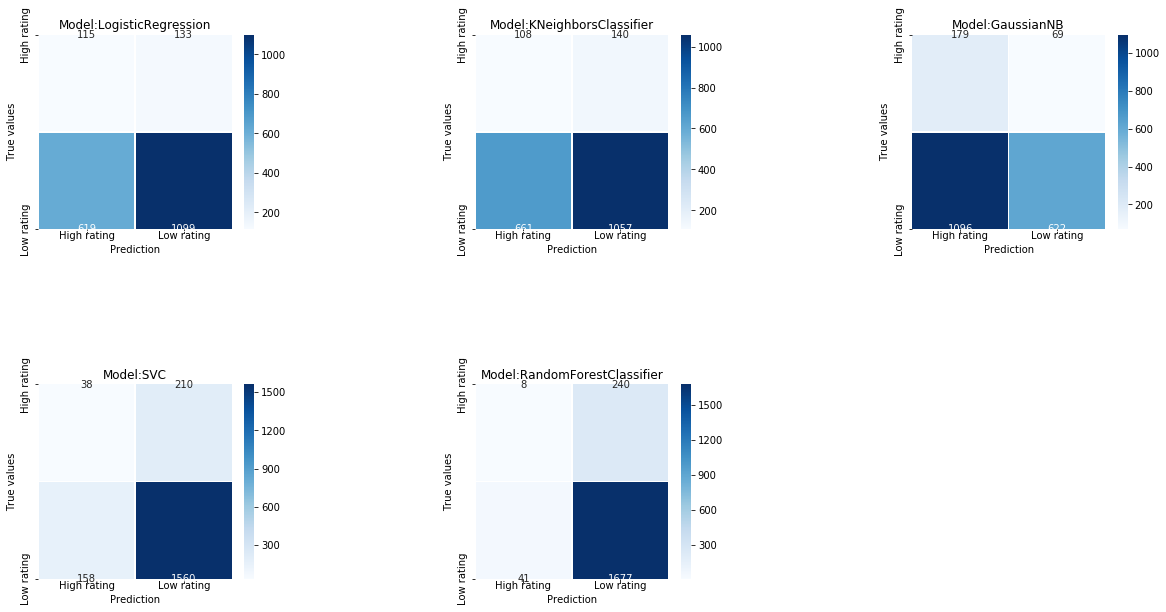

In [37]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i in range(0, 5):
    ax = fig.add_subplot(2, 3, i+1)
    sns.heatmap(list_conf_matrix[i][1],annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Blues")
    ax.set_ylabel('True values')
    ax.set_xlabel('Prediction')
    ax.set_title(f'Model:{list_conf_matrix[i][0]}')
    ax.xaxis.set_ticklabels(['High rating', 'Low rating'], va="center")
    ax.yaxis.set_ticklabels(['High rating', 'Low rating'],va="center")


### Baseline Model

Random forest based on F1 score. In addition, it also performs well on accuracy(confussion matrix) and can handle large datasets to find predictive features.

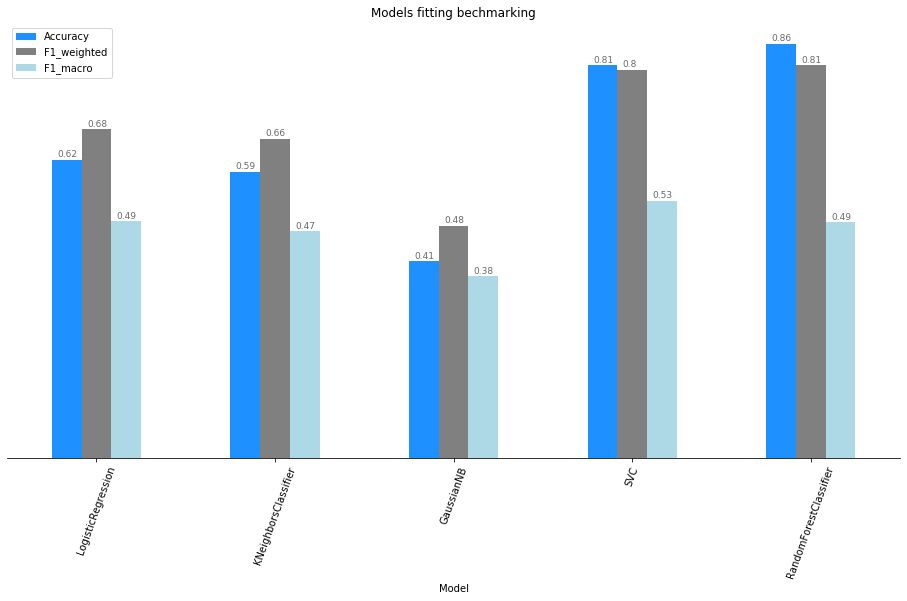

In [38]:
models_bench = pd.DataFrame(list_scores, columns = ['Model', 'Accuracy', 'F1_weighted', 'F1_macro'])
models_bench.set_index(["Model"], inplace=True)

ax = models_bench.plot(kind='bar', figsize=(16,8),color=['dodgerblue', 'grey','lightblue'], title='Models fitting bechmarking', rot=70)
ax.set_alpha(0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for i in ax.patches:
    ax.text(i.get_x()+0.03, i.get_height()+0.005, str(round((i.get_height()), 2)), fontsize=9, color='dimgrey')

### Tunning the model improving hyperparameters

Two potential models for the data are Random Forest classifier and Support Vector Classification. We will use Random Search CV to find better hyperparameters.

In [39]:
# Limit the number of folds and samples
cv=5
n_iter=5

# Defining estimators and search space
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 5)]
min_samples_leaf = [int(x) for x in np.linspace(start=50, stop=200, num = 5)]

hyperparameters = dict(n_estimators=n_estimators,
                       #max_depth=max_depth,                           
                       min_samples_leaf=min_samples_leaf,                            
                       bootstrap=[True],
                       oob_score=[True]
                       )

clf_random_cv = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                          hyperparameters, 
                          cv=cv, 
                          n_iter=n_iter,       
                          scoring='f1_weighted')


In [40]:
clf_random_cv.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

The chosen hyperparameters were:

In [41]:
clf_random_cv.best_params_

{'oob_score': True,
 'n_estimators': 377,
 'min_samples_leaf': 87,
 'bootstrap': True}

The F1 score on the validation set is approximately still the same even after the tuning. In fact, the OOB are not reducing after n_trees=50. This will be then our final model

In [42]:
y_pred = clf_random_cv.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.01      0.02       248
           1       0.87      1.00      0.93      1718

    accuracy                           0.87      1966
   macro avg       0.77      0.50      0.47      1966
weighted avg       0.85      0.87      0.82      1966



In addition, we plot the F1 score vs. the number of tree estimators to check if the score can still be improved.

In [43]:
list_n_estimators = [1, 10, 20,50,100,200,400, 800]
list_oob_scores = []
list_f1_scores = []
for i in list_n_estimators:
    clf= RandomForestClassifier(n_estimators=i,oob_score=True,random_state=42)
    clf.fit(X_train, y_train)
    y_pred_val=clf.predict(X_valid)
    list_f1_scores.append(f1_score(y_valid, y_pred_val, average='weighted'))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=

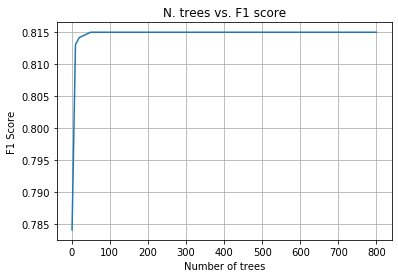

In [44]:
fig, ax = plt.subplots()
ax.plot(list_n_estimators, list_f1_scores)
ax.set(xlabel='Number of trees', ylabel='F1 Score',
       title='N. trees vs. F1 score')
ax.grid()

plt.show()

### Feature Importance

Check F1 score permutation and drop-column importance for our chosen model (Random Forest with parameters selected from Random Search CV)

In [45]:
clf = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=132, 
                             min_samples_leaf=87, bootstrap=True)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=87, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=132,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [47]:
def f1(rf, X, y):
    '''Calculate F1 score'''
    return f1_score(y, rf.predict(X))

In [48]:
perm_rfpimp_f1 = permutation_importances(clf, X_valid, y_valid, f1)

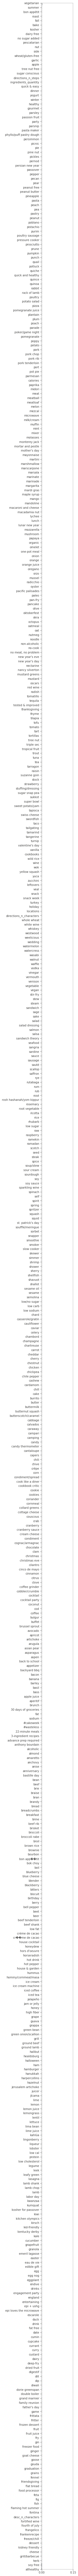

In [49]:
plot_importances(perm_rfpimp_f1).view()

In [50]:
perm_rfpimp_f1.head(10)

,Importance
Feature,
vegetarian,0.001123
summer,0.000797
bon appétit,0.000616
roast,0.000580
fall,0.000543
bake,0.000543
kosher,0.000363
dairy free,0.000290
no sugar added,0.000290


In [51]:
dcol_rfpimp_f1 = dropcol_importances(clf, X_valid, np.array(y_valid).ravel(), metric=f1(clf, X_valid, y_valid))

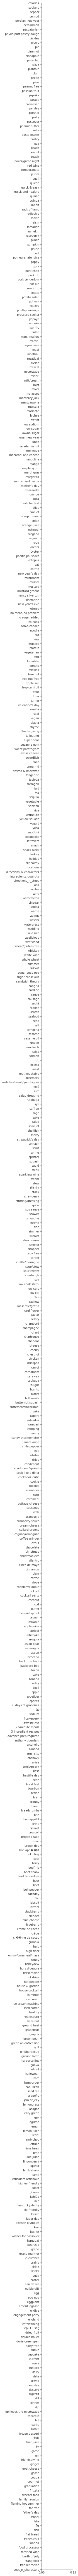

In [52]:
plot_importances(dcol_rfpimp_f1).view()

In [53]:
dcol_rfpimp_f1.head(10)

,Importance
Feature,
calories,0.0
poblano,0.0
pepper,0.0
pernod,0.0
persian new year,0.0
persimmon,0.0
pescatarian,0.0
phyllo/puff pastry dough,0.0
pickles,0.0


Permutation and drop-column importance show different rankings in their relative importances, and there is no clear features that stand out as being the most predictive. Additionally, we see low permutation importances, and zero or near-zero drop-column importances.

This could indicate codependent features. Let's check our feature correlation matrix.

In [54]:
feat_corr_mat = feature_corr_matrix(X_valid)
feat_corr_mat

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructur

,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,snack,snack week,turkey,holiday,allhealthy,locations,directions_n_characters,ingredients_quantity,directions_n_steps,desc_n_characters
calories,1.0000,0.7558,0.8556,0.4765,NaN,NaN,0.0508,0.0116,0.0384,0.0268,...,-0.0333,-0.0333,0.0789,-0.0099,-0.1247,0.0500,0.3474,0.3201,0.2662,0.0798
protein,0.7558,1.0000,0.6669,0.6242,NaN,NaN,0.0505,-0.0278,0.0361,0.0109,...,-0.0321,-0.0321,0.1359,-0.0915,-0.0836,0.0778,0.2781,0.2820,0.2094,0.0785
fat,0.8556,0.6669,1.0000,0.4317,NaN,NaN,0.0521,0.0259,0.0386,0.0182,...,-0.0255,-0.0255,0.0624,-0.0513,-0.1479,0.0330,0.3016,0.2820,0.2498,0.0841
sodium,0.4765,0.6242,0.4317,1.0000,NaN,NaN,0.0365,-0.0128,0.0268,0.0112,...,-0.0381,-0.0381,0.0693,-0.0653,-0.1110,0.0485,0.1705,0.2762,0.1411,0.0957
#cakeweek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
locations,0.0500,0.0778,0.0330,0.0485,NaN,NaN,-0.0073,-0.0051,-0.0051,-0.0146,...,-0.0051,-0.0051,0.0325,-0.0769,-0.0324,1.0000,-0.0741,0.0073,-0.0962,-0.0680
directions_n_characters,0.3474,0.2781,0.3016,0.1705,NaN,NaN,-0.0130,0.0198,-0.0031,0.0841,...,-0.0239,-0.0239,0.0218,0.1234,-0.2080,-0.0741,1.0000,0.5959,0.7706,0.1520
ingredients_quantity,0.3201,0.2820,0.2820,0.2762,NaN,NaN,0.0412,-0.0282,0.0338,0.0571,...,-0.0142,-0.0142,0.0561,0.0485,-0.1244,0.0073,0.5959,1.0000,0.4925,0.1149
directions_n_steps,0.2662,0.2094,0.2498,0.1411,NaN,NaN,-0.0260,0.0226,-0.0034,0.0564,...,0.0297,0.0297,-0.0147,0.0969,-0.2107,-0.0962,0.7706,0.4925,1.0000,0.1921


In [55]:
plt.figure(figsize=(200, 200))
sns.heatmap(feat_corr_mat, cmap="YlGnBu")
plt.show()

This heatmap is difficult to read with the many columns, and has been expanded as large as possible for readibility.

Upon close examination, among the majority of zero correlation between features (the teal green), we can see sports of darker blue, indicating that some features are strongly correlated.

5) DELIVER:
----

Finally, we use the test set to validate how our model would perform with unknown data. 

In [56]:
y_pred = clf_random_cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.00      0.01       292
           1       0.87      1.00      0.93      2021

    accuracy                           0.87      2313
   macro avg       0.52      0.50      0.47      2313
weighted avg       0.78      0.87      0.81      2313



In [57]:
confusion_mat = pd.DataFrame(
                    confusion_matrix(y_test, y_pred), 
                    index=['true: low (0)', 'true: high (1)'], 
                    columns=['pred: low (0)', 'pred: high (1)'])
print(confusion_mat)

                pred: low (0)  pred: high (1)
true: low (0)               1             291
true: high (1)              5            2016
